**<h1><center>House Price Prediction</center></h1>**

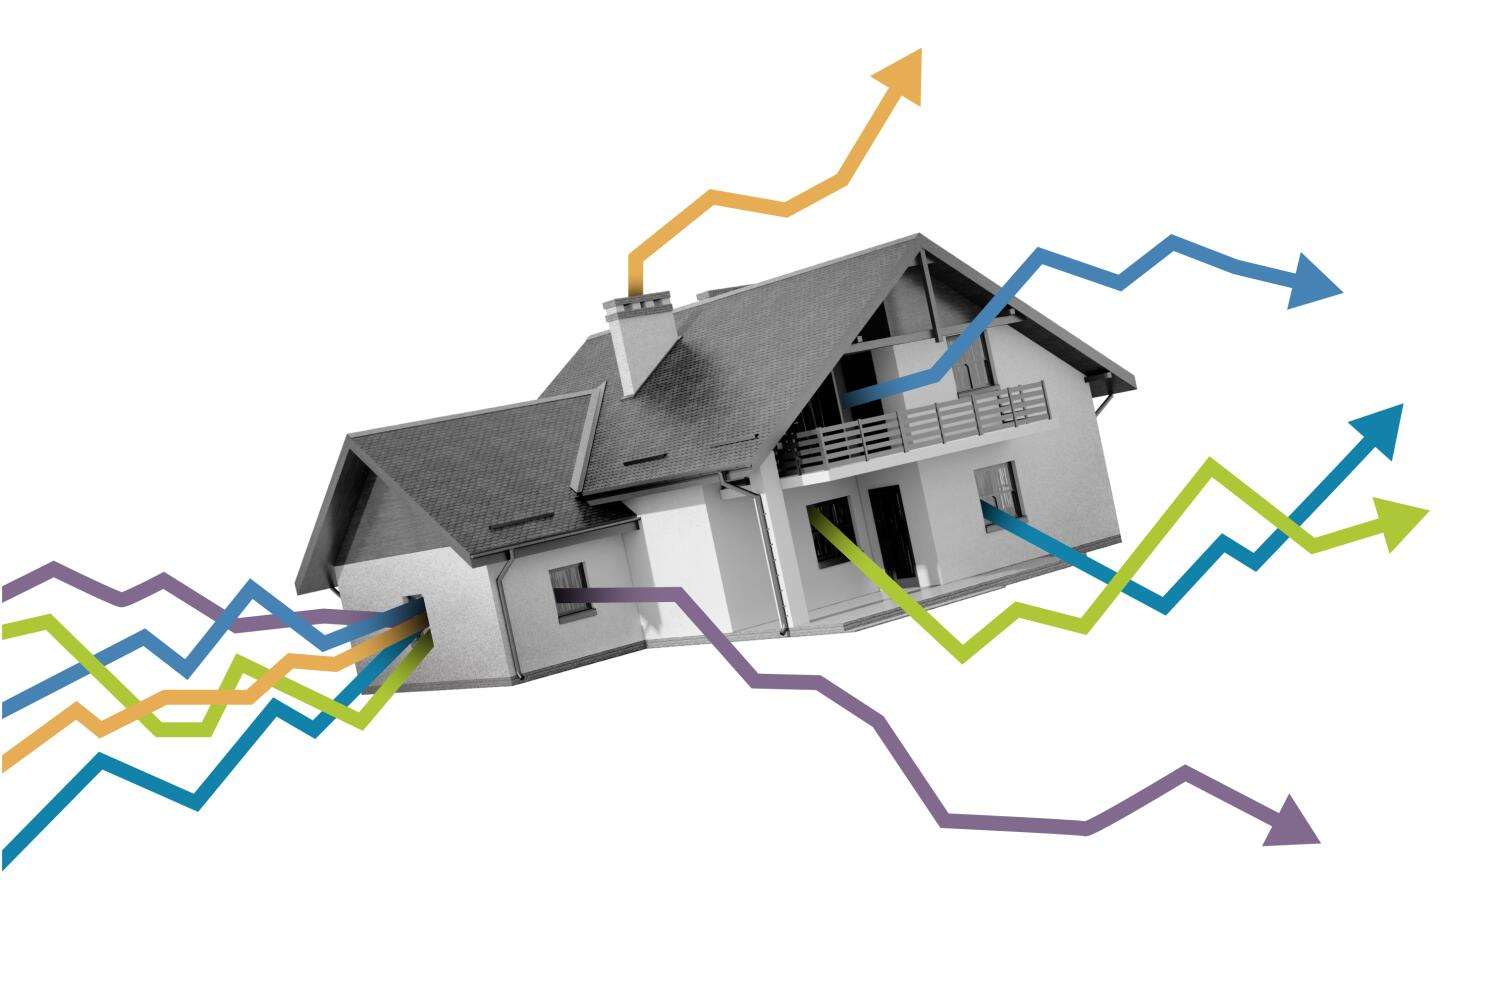

In [202]:

from IPython.display import Image,Markdown, display
image_path = "Cover.jpeg"
# Display the image
Image(filename=image_path)

### Table Of Content
* 1 Introduction
* 2 Libraries & Configuration
  * 2.1 Libraries
  * 2.2 Configuration
* 3 Data Wrangling
  * 3.1 Data Validation
  * 3.2 Data cleaning
* 4 EXploratory Data Analysis
  * 4.1 Target Variable
  * 4.2 Numerical Features
  * 4.3 Categorical Features
  * 4.4 insights
* 5 Model fitting and Evaluation
  * 5.1 Data Pre-processing
  * 5.2 Logistic Regression
  * 5.3 Random Forest
* 6 Insights

  

# Introduction:
The real estate market is complex and dynamic, with numerous factors influencing the prices of homes. Understanding these factors and accurately predicting house prices is crucial for buyers, sellers, real estate agents, and investors. Our House Price Prediction Model is designed to provide reliable price estimates for homes based on a comprehensive set of features.

### Problem Statement:
Accurately predicting house prices is a critical challenge in the real estate market, influenced by a multitude of factors including dwelling types, zoning classifications, lot features, property conditions, and sale conditions. Traditional methods of property valuation often rely on limited data and subjective assessments, leading to inconsistencies and inaccuracies. This creates uncertainty for various stakeholders such as home buyers, sellers, real estate agents, and investors, potentially resulting in financial losses and inefficient market operations.



### Objective:
To address these challenges, our goal is to develop a robust House Price Prediction Model that leverages advanced machine learning techniques to analyze a comprehensive set of property features and market data with an accuracy target of 85%. This model aims to provide accurate, data-driven price predictions that can be used by various stakeholders to make informed decisions in the real estate market.


### In this notebook, we aim to answer several Key Questions for Gaining Insights into House prices:

#### General Questions

1. **What is the distribution of house prices?**
   - Understand the overall spread, central tendency, and any outliers in house prices.

2. **How do house prices vary by neighborhood?**
   - Examine the average prices and price distributions across different neighborhoods.

#### Feature-Specific Questions

3. **What is the impact of dwelling type (MSSubClass) on house prices?**
   - Analyze how different types of dwellings (e.g., 1-story, 2-story, duplex) affect house prices.

4. **How does zoning classification (MSZoning) influence house prices?**
   - Investigate the relationship between different zoning classifications (e.g., residential, commercial) and house prices.

5. **What is the relationship between lot size (LotArea) and house prices?**
   - Explore how the size of the lot impacts the value of the house.

6. **How do lot features (e.g., LotFrontage, LotShape, LandContour) correlate with house prices?**
   - Examine the effect of lot frontage, lot shape, and land contour on house prices.

7. **How does the condition and quality of the house (OverallQual, OverallCond) impact house prices?**
   - Assess how the overall quality and condition ratings of a house influence its price.

8. **What is the effect of the year built (YearBuilt) and year remodeled (YearRemodAdd) on house prices?**
   - Analyze whether newer houses or recently remodeled houses fetch higher prices.

#### Location and Proximity

9. **How do proximity features (Condition1, Condition2) affect house prices?**
   - Determine how proximity to various conditions (e.g., arterial streets, railroads, parks) impacts house prices.

10. **How does the physical location (Neighborhood) within the city influence house prices?**
    - Compare house prices across different neighborhoods to identify high and low-value areas.

#### Interior and Exterior Features

11. **How do different exterior features (e.g., Exterior1st, Exterior2nd, Foundation) relate to house prices?**
    - Examine how the type and quality of exterior materials and foundation types affect house prices.

12. **What is the impact of basement features (e.g., TotalBsmtSF, BsmtQual, BsmtCond) on house prices?**
    - Analyze how basement size, quality, and condition correlate with house prices.

13. **How do living area features (e.g., GrLivArea, 1stFlrSF, 2ndFlrSF) influence house prices?**
    - Investigate the relationship between the total living area and house prices.

#### Amenities and Additional Features

14. **How do the number of bathrooms (FullBath, HalfBath) and bedrooms (Bedroom) affect house prices?**
    - Assess the impact of the number of bathrooms and bedrooms on house prices.

15. **What is the effect of kitchen quality (KitchenQual) and the number of rooms above grade (TotRmsAbvGrd) on house prices?**
    - Explore how kitchen quality and the total number of rooms above grade influence house prices.

16. **How do amenities such as fireplaces (Fireplaces, FireplaceQu), garages (GarageType, GarageCars), and pools (PoolArea, PoolQC) impact house prices?**
    - Determine the value added by amenities like fireplaces, garages, and pools.

#### Market and Sale Conditions

17. **How do sale type (SaleType) and sale condition (SaleCondition) affect house prices?**
    - Analyze the influence of different sale types (e.g., warranty deed, cash sale) and sale conditions (e.g., foreclosure, family sale) on house prices.

18. **What is the impact of the time of sale (MoSold, YrSold) on house prices?**
    - Investigate seasonal trends and changes in house prices over time.

By answering these questions through visualizations and statistical analyses during the EDA, i can uncover important insights and relationships that will help inform the house price prediction model.


### Data Sources:

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.

* <a href="https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview" target="_blank">
    <img src="https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white" alt="Kaggle">
 </a>

### GitHub Project Repository :
* [House price prediction](https://github.com/SaliuA/ShopSmart_Customer_analysis)

This project also serves as a capstone project for the Data Science Diploma at AltSchool.
* [Alt school Data science](https://altschoolafrica.com/)
### Summary :

### GitHub Project Repository :
* [House Price Prediction](https://github.com/SaliuA/Customer_churn_prediction)


### Summary :




# 2 Libraries & Configurations

### 2.1 Libraries
Loading the relevant libraries and user-defined functions

In [203]:
"""importing relevant libraries"""
import pandas as pd  # for data manipulation
import numpy as np   # for data computation
import matplotlib.pyplot as plt #for 2D data visualization
import seaborn as sns    #for 2D data visualization
from scipy import stats     # for statistics
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from math import sqrt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE

from imblearn.over_sampling import SMOTE

# utility function to print markdown string
def printmd(string):
    display(Markdown(string))

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### 2.2 Configurations
Setting the configurations to be used for our analysis.

In [204]:
# seed value
SEED = 42
#set seaborn theme
sns.set_theme(style="darkgrid")
pd.set_option('display.max_columns', None)


# 3. Data Wrangling
This data set has 1460 rows and 81 columns consisting of both numeric and categorical features.


In [205]:
#loading the dataframe
df= pd.read_csv('train.csv')
#viewing the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [206]:
df.shape

(1460, 81)

### 3.1 Data Validation
The id colunm was dropped for being a unique identifer

In [207]:
#cheking information on the all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [208]:
#checking statistical information about the numeric colunms
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [209]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print unique values for each categorical column
for col in categorical_columns:
    printmd(f'#### {col}:\n - {df[col].unique()}')

#### MSZoning:
 - ['RL' 'RM' 'C (all)' 'FV' 'RH']

#### Street:
 - ['Pave' 'Grvl']

#### Alley:
 - [nan 'Grvl' 'Pave']

#### LotShape:
 - ['Reg' 'IR1' 'IR2' 'IR3']

#### LandContour:
 - ['Lvl' 'Bnk' 'Low' 'HLS']

#### Utilities:
 - ['AllPub' 'NoSeWa']

#### LotConfig:
 - ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

#### LandSlope:
 - ['Gtl' 'Mod' 'Sev']

#### Neighborhood:
 - ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

#### Condition1:
 - ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

#### Condition2:
 - ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

#### BldgType:
 - ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

#### HouseStyle:
 - ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

#### RoofStyle:
 - ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']

#### RoofMatl:
 - ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']

#### Exterior1st:
 - ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']

#### Exterior2nd:
 - ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']

#### MasVnrType:
 - ['BrkFace' nan 'Stone' 'BrkCmn']

#### ExterQual:
 - ['Gd' 'TA' 'Ex' 'Fa']

#### ExterCond:
 - ['TA' 'Gd' 'Fa' 'Po' 'Ex']

#### Foundation:
 - ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']

#### BsmtQual:
 - ['Gd' 'TA' 'Ex' nan 'Fa']

#### BsmtCond:
 - ['TA' 'Gd' nan 'Fa' 'Po']

#### BsmtExposure:
 - ['No' 'Gd' 'Mn' 'Av' nan]

#### BsmtFinType1:
 - ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']

#### BsmtFinType2:
 - ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']

#### Heating:
 - ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']

#### HeatingQC:
 - ['Ex' 'Gd' 'TA' 'Fa' 'Po']

#### CentralAir:
 - ['Y' 'N']

#### Electrical:
 - ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]

#### KitchenQual:
 - ['Gd' 'TA' 'Ex' 'Fa']

#### Functional:
 - ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']

#### FireplaceQu:
 - [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']

#### GarageType:
 - ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']

#### GarageFinish:
 - ['RFn' 'Unf' 'Fin' nan]

#### GarageQual:
 - ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']

#### GarageCond:
 - ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']

#### PavedDrive:
 - ['Y' 'N' 'P']

#### PoolQC:
 - [nan 'Ex' 'Fa' 'Gd']

#### Fence:
 - [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']

#### MiscFeature:
 - [nan 'Shed' 'Gar2' 'Othr' 'TenC']

#### SaleType:
 - ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']

#### SaleCondition:
 - ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']

In [210]:
#dropping redundant Id column becuase it is a unique identifier
df.drop(['Id'],axis=1,inplace=True)

### 3.2 Data Cleaning


In [211]:
#checking for missing data
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data != 0]
missing_data=missing_data.reset_index().sort_values(0,ascending=False)
missing_data.rename(columns={'index': 'Columns', 0: 'Missing values'}, inplace=True)
missing_data['missing value percentage']= round(missing_data['Missing values']*100/len(df),2)
missing_data


,Columns,Missing values,missing value percentage
16,PoolQC,1453,99.52
18,MiscFeature,1406,96.30
1,Alley,1369,93.77
17,Fence,1179,80.75
2,MasVnrType,872,59.73
10,FireplaceQu,690,47.26
0,LotFrontage,259,17.74
11,GarageType,81,5.55
12,GarageYrBlt,81,5.55
13,GarageFinish,81,5.55


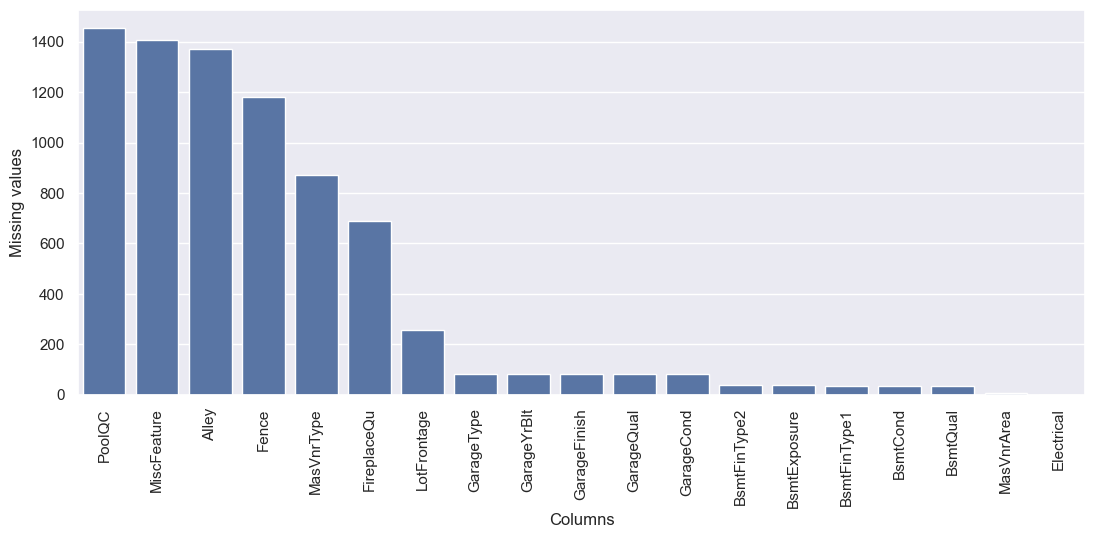

In [212]:
#visualizing the missing values
#plot Missing values
plt.figure(figsize=(13, 5))
sns.barplot(x='Columns', y='Missing values', data=missing_data)
plt.xticks(rotation = 90)
plt.show()

In [213]:
# Droping columns with more than 60% missing values
threshold = 60
columns_to_drop = missing_data[missing_data['missing value percentage'] >= threshold]['Columns'].tolist()
df.drop(columns=columns_to_drop, inplace=True)

#### 3.2.1 Filling missing values

- MasVnrType Column

In [214]:
#Exploring the pattern of the missing data
df[df['MasVnrType'].isnull()].sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
592,20,RL,60.0,6600,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,8,1982,2003,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,Gd,PConc,TA,Gd,No,GLQ,816,Unf,0,0,816,GasA,Ex,Y,SBrkr,816,0,0,816,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1985.0,Fin,2,816,TA,TA,Y,0,0,0,0,0,0,0,6,2008,WD,Normal,138000
649,180,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,131,GLQ,499,0,630,GasA,Gd,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,12,2007,WD,Normal,84500
528,30,RL,58.0,9098,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348,Unf,0,180,528,GasA,Ex,Y,SBrkr,605,0,0,605,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,144,0,0,0,0,7,2007,WD,Normal,86000
461,70,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,2Story,7,9,1936,2007,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,Gd,Gd,PConc,Gd,Gd,No,ALQ,350,BLQ,210,0,560,GasA,Ex,Y,SBrkr,575,560,0,1135,1,0,1,0,3,1,Gd,6,Typ,0,NaN,Detchd,1971.0,RFn,2,576,TA,TA,Y,256,0,0,0,0,0,0,4,2009,WD,Normal,155000
614,180,RM,21.0,1491,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,SFoyer,4,6,1972,1972,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,Gd,TA,Av,LwQ,150,GLQ,480,0,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,96,24,0,0,0,0,0,5,2010,WD,Normal,75500


In [215]:
#MasVnrType is missing were MasVnrArea is 0 indicating Masonry veneer type is None , filling wth None
df['MasVnrType'].fillna('None',inplace=True)

- FireplaceQu column

In [216]:
#Exploring the pattern of the missing data
df[df['FireplaceQu'].isnull()].sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
170,50,RM,NaN,12358,Pave,IR1,Lvl,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Fin,5,6,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,360,Unf,0,360,720,GasA,TA,Y,SBrkr,854,0,528,1382,0,0,1,1,2,1,TA,7,Typ,0,NaN,Detchd,1991.0,Unf,2,660,TA,TA,Y,237,0,0,0,0,0,0,5,2007,WD,Normal,128500
1001,30,RL,60.0,5400,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,0,Unf,0,691,691,GasA,Ex,Y,FuseA,691,0,0,691,0,0,1,0,2,1,Ex,4,Typ,0,NaN,Detchd,1920.0,Unf,1,216,Fa,TA,N,0,20,94,0,0,0,0,1,2007,WD,Abnorml,86000
277,20,RL,140.0,19138,Pave,Reg,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,1Story,4,5,1951,1951,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,120,Unf,0,744,864,GasA,Ex,Y,SBrkr,864,0,0,864,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1951.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,0,6,2010,WD,Normal,141000
64,60,RL,NaN,9375,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,573.0,TA,TA,PConc,Gd,TA,No,GLQ,739,Unf,0,318,1057,GasA,Ex,Y,SBrkr,1057,977,0,2034,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,1998.0,RFn,2,645,TA,TA,Y,576,36,0,0,0,0,0,2,2009,WD,Normal,219500
1408,70,RM,60.0,7740,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,7,1910,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,622,622,GasA,Gd,Y,SBrkr,741,622,0,1363,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1966.0,Unf,2,528,TA,TA,Y,0,0,0,0,168,0,0,6,2010,WD,Normal,125500


In [217]:
#FireplaceQu is missing were Fireplaces is 0 indicating there are no fireplaces, filling wth None
df['FireplaceQu'].fillna('None',inplace=True)

- LotFrontage column

In [219]:
#Exploring the pattern of the missing data
df[df['LotFrontage'].isnull()].sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1230,90,RL,NaN,18890,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,1361,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2,600,TA,TA,N,155,24,145,0,0,0,8300,8,2007,WD,Normal,190000
458,70,RM,NaN,5100,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,7,1925,1996,Hip,CompShg,Stucco,Wd Shng,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0,Unf,0,588,588,GasA,Fa,Y,SBrkr,833,833,0,1666,0,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1925.0,Unf,1,228,TA,TA,Y,192,63,0,0,0,0,0,6,2008,WD,Normal,161000
868,60,RL,NaN,14762,Pave,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Feedr,Norm,1Fam,2Story,5,6,1948,1950,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,SBrkr,1547,720,53,2320,0,0,2,0,2,1,TA,7,Typ,1,TA,Attchd,1979.0,Unf,2,672,TA,TA,P,120,144,0,0,0,0,0,5,2006,WD,Normal,169000
745,60,RL,NaN,8963,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,9,1976,1996,Hip,CompShg,VinylSd,VinylSd,BrkFace,289.0,Ex,Gd,CBlock,TA,Gd,No,GLQ,575,ALQ,80,487,1142,GasA,Ex,Y,SBrkr,1175,1540,0,2715,0,1,3,1,4,1,Gd,11,Typ,2,TA,BuiltIn,1994.0,Fin,2,831,TA,TA,Y,0,204,0,0,0,0,0,7,2008,WD,Normal,299800
541,60,RL,NaN,11000,Pave,Reg,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,72.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,969,969,GasA,Ex,Y,SBrkr,997,1288,0,2285,0,0,2,1,4,1,Gd,8,Typ,1,TA,BuiltIn,2000.0,Fin,3,648,TA,TA,Y,0,56,0,0,0,0,0,6,2007,WD,Normal,248000


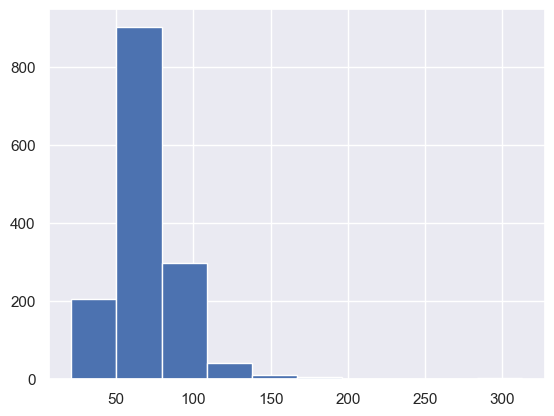

In [230]:
#observing the distribution of LotFrontage 
df['LotFrontage'].hist()
plt.show()

In [229]:
#Due to the skewness of LotFrontage, flling with the median value would be more appropriate grouped by Zones
df['LotFrontage'] = df.groupby("MSZoning")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

- GarageType, GarageFinish, GarageQual, GarageCond 

In [233]:
#GarageType, GarageFinish, GarageQual and GarageCond replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('None')

- GarageYrBlt, GarageArea and GarageCars 

In [236]:
#GarageYrBlt replacing with zero
df['GarageYrBlt'].fillna(int(0),inplace=True)

# 4.0 Exploratory Data Analysis


### 4.1 Target Variable- Churn Value

The variable 'Churn Value' is our target variable for predictive analysis, crucial for assessing the churn rate among customers. It quantifies the number of customers who have churned versus those who have remained.

  Churn Label  count
0          No   5174
1         Yes   1869


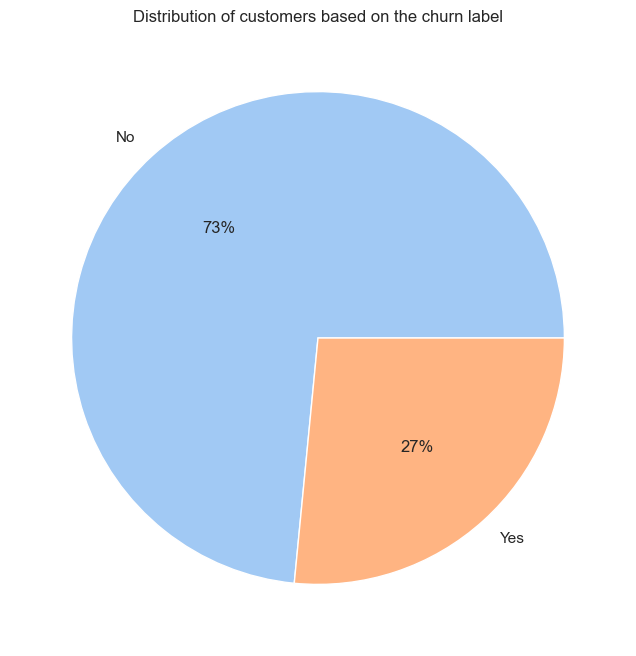

Pie chart showing the distirbution of customers based on churn label,figures indicate only 27% of customers churned

In [261]:
#checking the distribution of churned customers
df_churn=df["Churn Label"].value_counts().reset_index()
print(df_churn)
# Renaming columns for clarity
df_churn.columns = ['Churn', 'Frequency']
#checking the distribution of high and low customer traffic on the website with a pie chart
data = df_churn['Frequency']
labels = df_churn['Churn']
# Defining Seaborn color palette to use
colors = sns.color_palette('pastel')[0:len(labels)]
# Creating the  pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Distribution of customers based on the churn label')
plt.show()
printmd('Pie chart showing the distirbution of customers based on churn label,figures indicate only 27% of customers churned')

### 4.2 Categorical Features

Exploring the relationship between our categorical features and churn rate


#### Demographic and Customer Analysis

- Age

Exploring the relationship between Age groups and churn

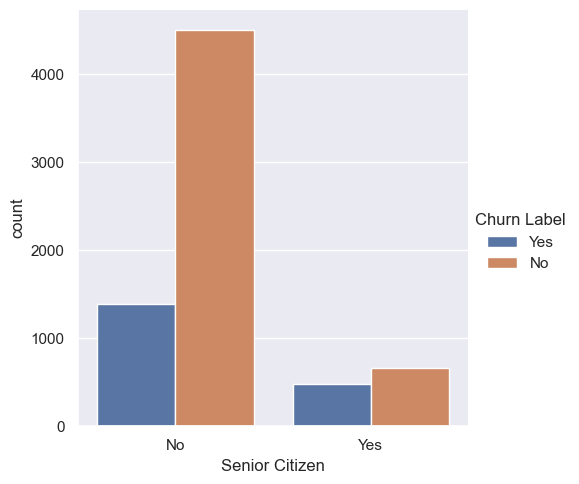

**While senior citizens constitute a smaller proportion of the overall dataset, a higher percentage of them have churned.**

In [262]:
#exploring the relationships between age and churn.

sns.catplot(x='Senior Citizen',hue='Churn Label',data=df, kind="count")
plt.show()

printmd("**While senior citizens constitute a smaller proportion of the overall dataset, a higher percentage of them have churned.**")

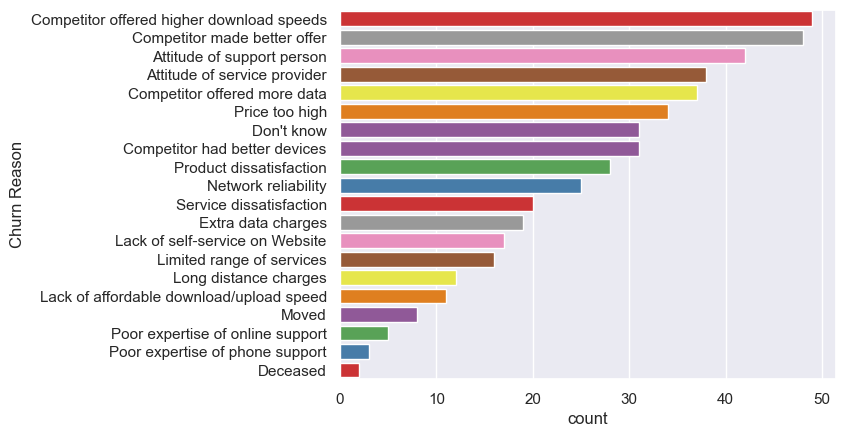

The presence of competitors plays a significant role in the high churn rate observed among senior citizens.

In [263]:
#Exploring the reason for high churn rate amongst senior citizens
df_senior= df[(df['Senior Citizen']=='Yes')&(df['Churn Label']=='Yes') ]
df_senior=df_senior['Churn Reason'].value_counts().reset_index()
sns.barplot(df_senior,y='Churn Reason',x='count',hue='count',legend=False,palette="Set1")
plt.show()
printmd('The presence of competitors plays a significant role in the high churn rate observed among senior citizens.')

- Gender
Exploring the relationship between churn and Gender.

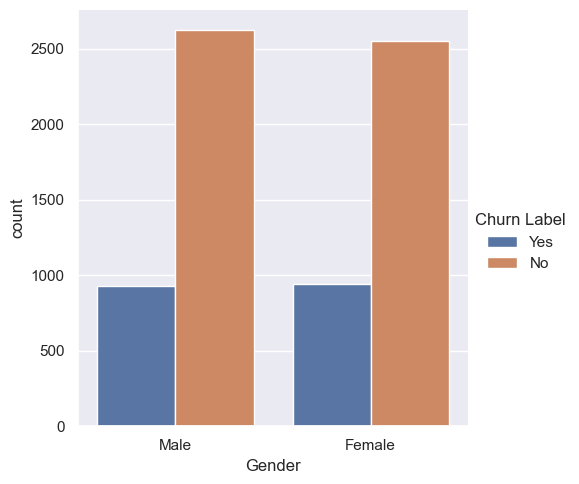

**The bar chart indicates that gender has no correlation with churn value**

In [264]:
#Exploring the relatioship between gender and churn
sns.catplot(x='Gender',hue='Churn Label',data=df, kind="count")
plt.show()
printmd(f"**The bar chart indicates that gender has no correlation with churn value**")

- Partner/Dependants
Exploring the relationships between Partner/Dependants and churn

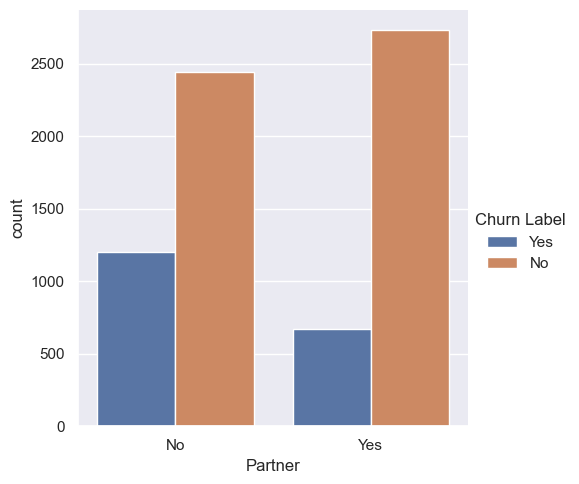

**The bar chart shows that individuals without partners have a higher churn value compared to those with partners.**

In [265]:
#Exploring the relatioship between partner and churn
sns.catplot(x='Partner',hue='Churn Label',data=df, kind="count")
plt.show()
printmd("**The bar chart shows that individuals without partners have a higher churn value compared to those with partners.**")

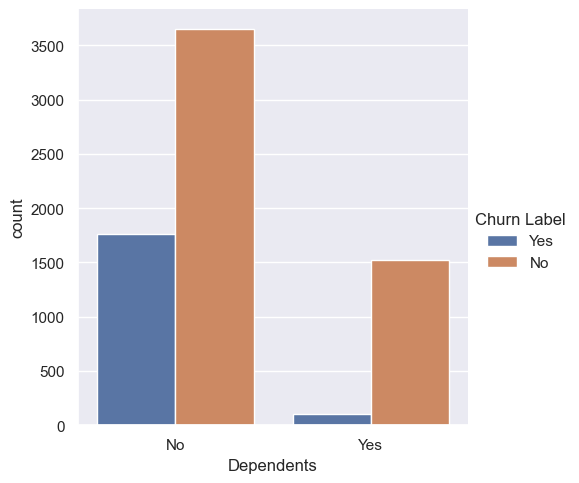

**The bar chart shows that individuals without dependants have a higher churn value compared to those with dependants.**

In [266]:
#Exploring the relatioship between dependents and churn
sns.catplot(x='Dependents',hue='Churn Label',data=df, kind="count")
plt.show()
printmd("**The bar chart shows that individuals without dependants have a higher churn value compared to those with dependants.**")

#### Location Analysis

- City

Exploring the relationship between churn and location

In [267]:
df_churned= df[df['Churn Label']=='Yes']
df_city= df_churned['City'].value_counts().reset_index()
df_city.rename(columns={'count': 'Churn_count'}, inplace=True)
#top 10 churn locations
df_city.head(10)



,City,Churn_count
0,Los Angeles,90
1,San Diego,50
2,San Francisco,31
3,San Jose,29
4,Sacramento,26
5,Fresno,16
6,Long Beach,15
7,Oakland,13
8,Glendale,13
9,Modesto,12


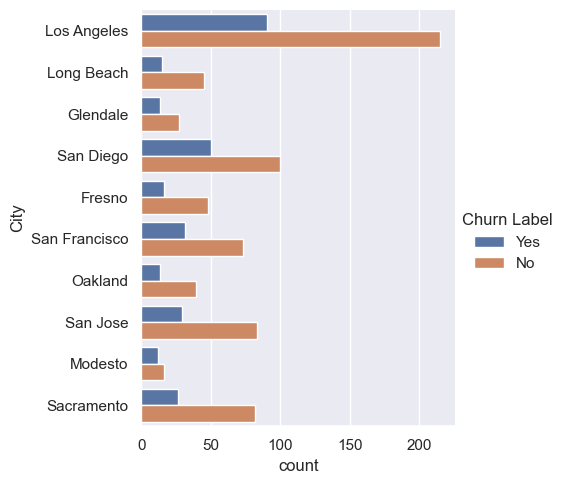

**“Los Angeles not only has the highest subscriber population, but also records the highest churn value.”**

In [268]:
# Select the top 10 cities with the highest churn count
city_top = df_city['City'][:10].values

# Filter the dataframe to include only the top 10 cities
city_top = df[df['City'].isin(city_top)]

# Create a count plot using seaborn
sns.catplot(y='City', hue='Churn Label', data=city_top, kind='count')

# Display the plot
plt.show()

# Print a markdown message with the explanation
printmd("**“Los Angeles not only has the highest subscriber population, but also records the highest churn value.”**")


- Churn Reason among Locations

Exploring the reason for churning in the top ten locations

In [269]:

# Group by 'City' and 'Reason for Churning', count the number of churns for each reason
churn_reasons = city_top[city_top['Churn Label'] == 'Yes'].groupby(['City', 'Churn Reason']).size()

# Reset the index of the DataFrame and rename the size column to 'Count'
churn_reasons = churn_reasons.reset_index(name='Count')

# Sort the DataFrame by 'City' and 'Count' in descending order so that the top reason for each city comes first
churn_reasons = churn_reasons.sort_values(['City', 'Count'], ascending=[True, False])

# Drop duplicate cities, keeping only the first occurrence (which, due to the sorting, is the top reason)
top_churn_reasons = churn_reasons.drop_duplicates('City').sort_values(by='Count',ascending=False)

display(top_churn_reasons[['City','Churn Reason']])
printmd("The trend of churning in major cities being driven by competition from other telecommunications firms, is also observed among senior citizens")


,City,Churn Reason
29,Los Angeles,Competitor offered higher download speeds
85,San Diego,Product dissatisfaction
63,Sacramento,Competitor offered more data
89,San Francisco,Competitor offered higher download speeds
0,Fresno,Attitude of service provider
10,Glendale,Attitude of support person
43,Modesto,Competitor offered higher download speeds
101,San Jose,Competitor offered higher download speeds
17,Long Beach,Attitude of support person
51,Oakland,Competitor had better devices


The trend of churning in major cities being driven by competition from other telecommunications firms, is also observed among senior citizens

### Service Subscription and Usage Patterns
Exploring the relationship between Subscription type, usage pattern and Churning

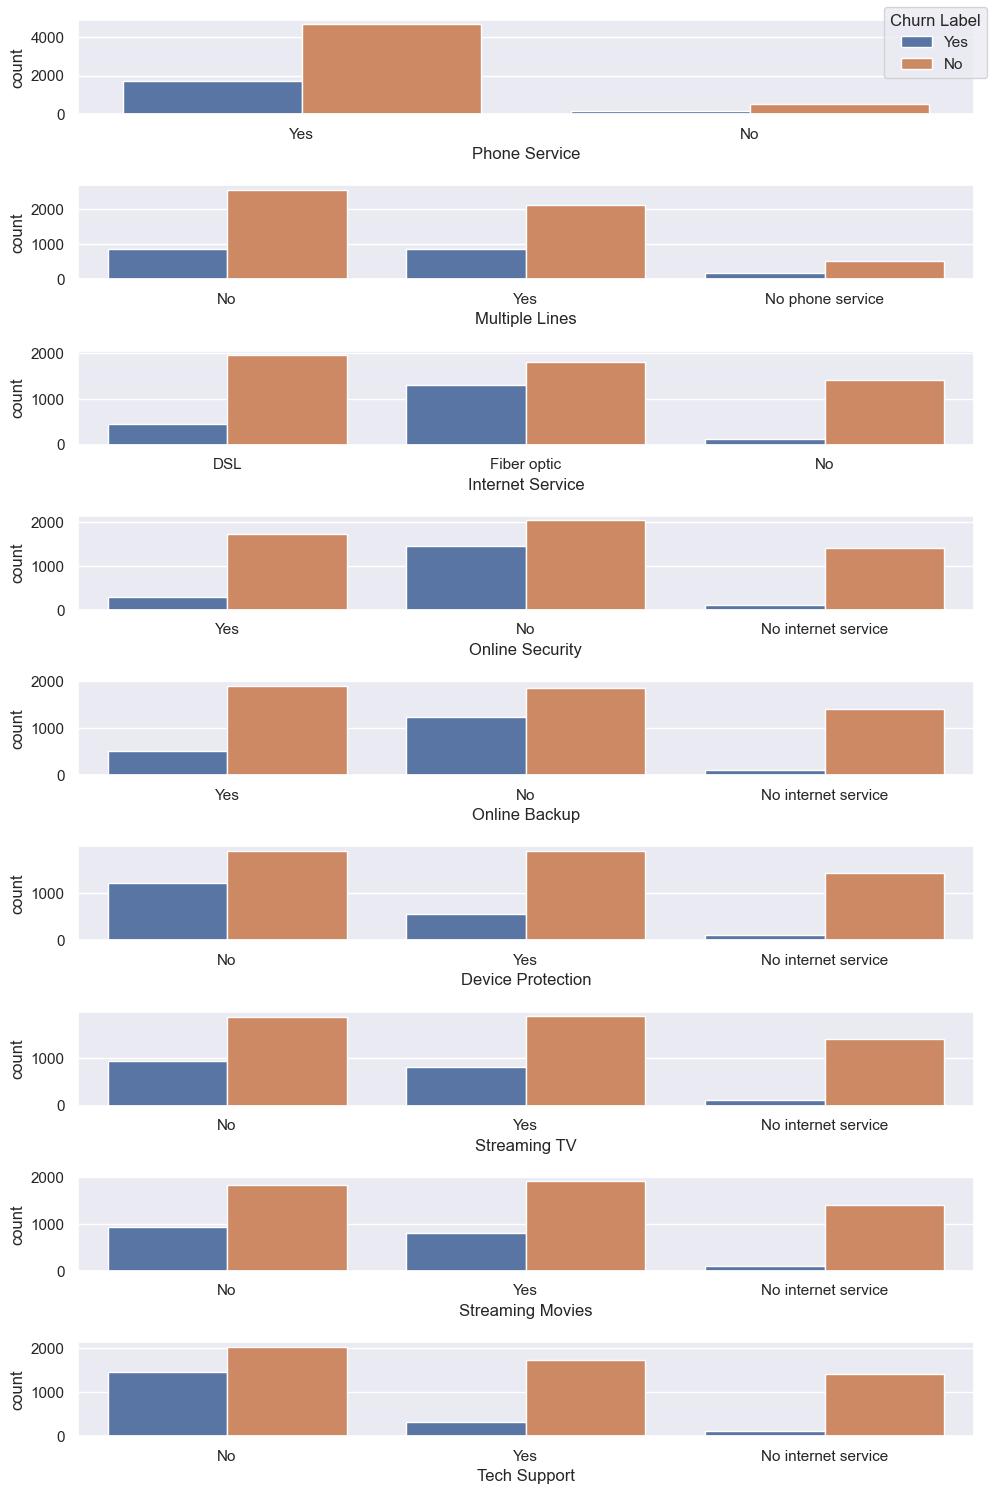

The bar charts illustrate that customers with phone service, multiple lines, internet service, online security, online backup, device protection, and streaming TV have varying churn rates, with a noticeable trend of higher churn among those without these services.

In [270]:


cat_columns = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Streaming TV','Streaming Movies','Tech Support']

fig, axes = plt.subplots(nrows=len(cat_columns), figsize=(10, 15))

for i, col in enumerate(cat_columns):
    sns.countplot(x=col, hue='Churn Label', data=df, ax=axes[i])
    axes[i].legend_.remove()  # Remove individual legends

# Create a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Churn Label')

plt.tight_layout()
plt.show()
printmd('The bar charts illustrate that customers with phone service, multiple lines, internet service, online security, online backup, device protection, and streaming TV have varying churn rates, with a noticeable trend of higher churn among those without these services.')


- Financial and Contractual Factors

Exploring the churning amongnst long term phone service contracts

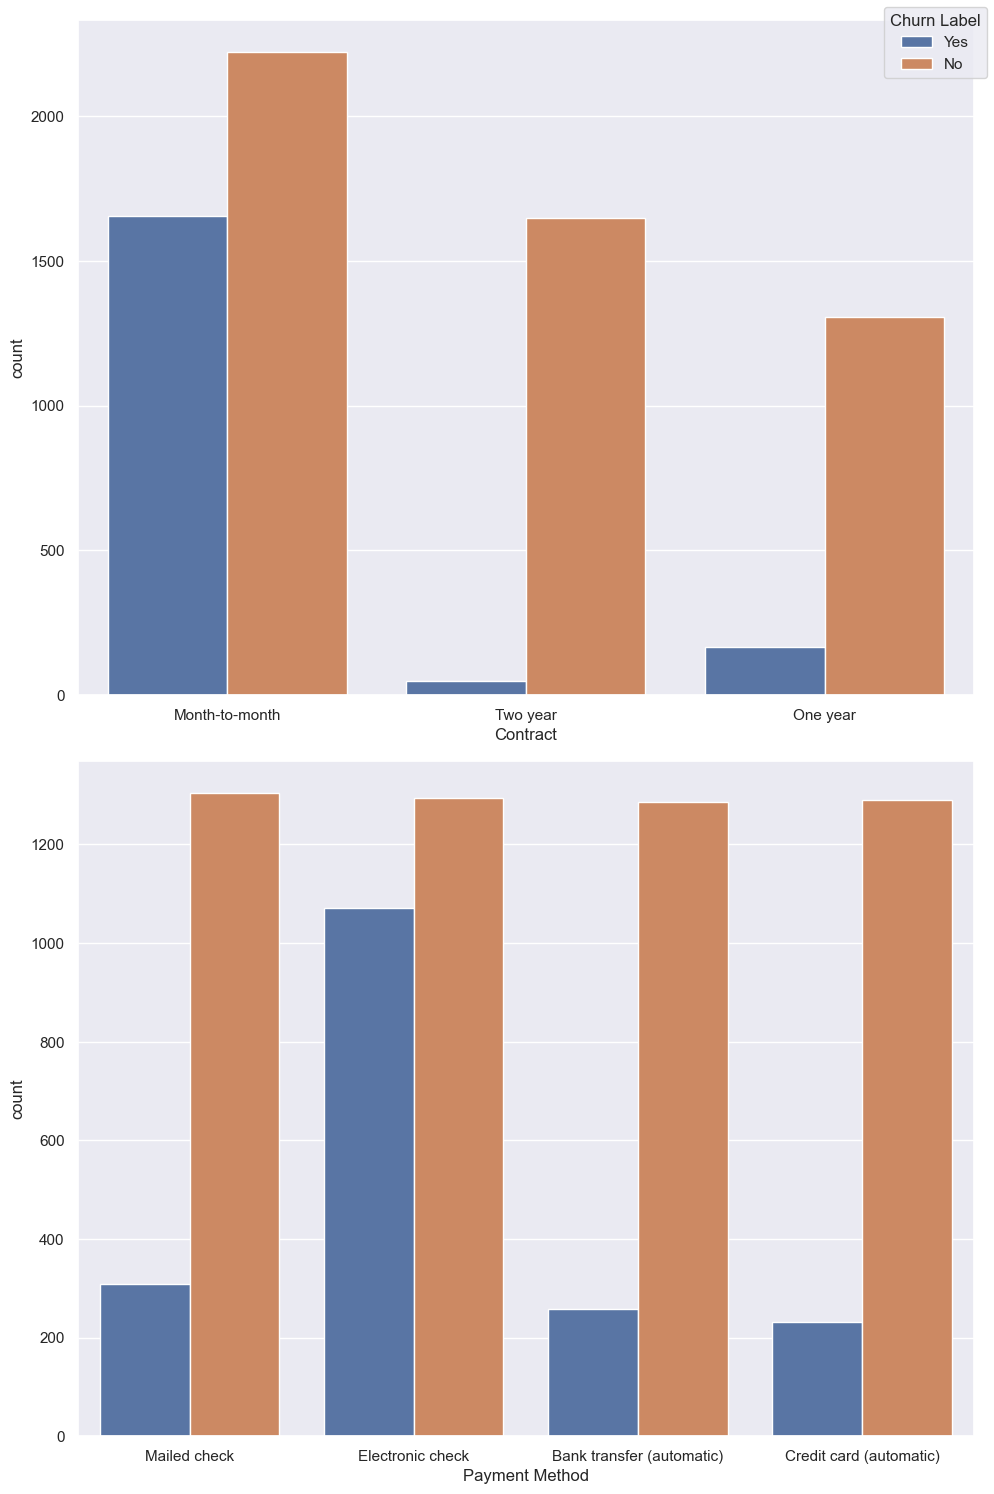

The bar chart indicates a lower churn rate among customers with long-term contracts, suggesting their loyalty. In contrast, customers with month-to-month contracts exhibit a higher churn rate. Furthermore, the chart reveals a high churn rate for the e-check payment method, while other payment methods consistently show a lower churn rate.

In [271]:


cat_columns = ['Contract', 'Payment Method']

fig, axes = plt.subplots(nrows=len(cat_columns), figsize=(10, 15))

for i, col in enumerate(cat_columns):
    sns.countplot(x=col, hue='Churn Label', data=df, ax=axes[i])
    axes[i].legend_.remove()  # Remove individual legends

# Create a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Churn Label')

plt.tight_layout()
plt.show()
printmd('The bar chart indicates a lower churn rate among customers with long-term contracts, suggesting their loyalty. In contrast, customers with month-to-month contracts exhibit a higher churn rate. Furthermore, the chart reveals a high churn rate for the e-check payment method, while other payment methods consistently show a lower churn rate.')

### 4.3 Numeric Variables 
Exploring the distribution of numeric features amongs the two two churn class



- Heatmap

Exloring corrolation amongs the numeric features

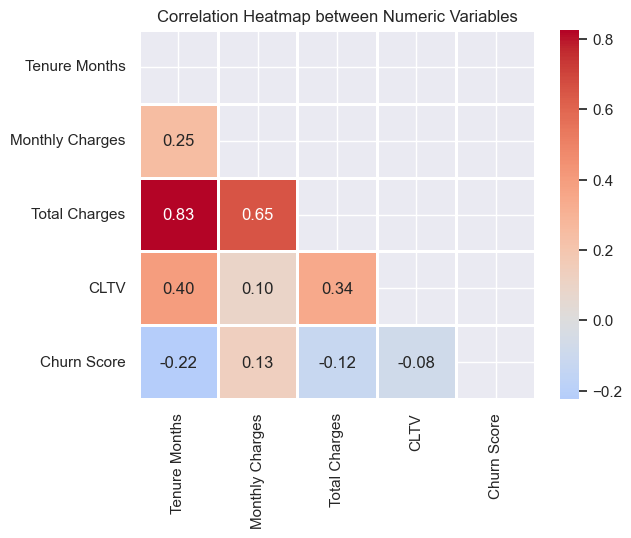

In [272]:

# Select numeric columns
numeric =['Tenure Months','Monthly Charges', 'Total Charges','CLTV','Churn Score']

# Create a correlation matrix for the numeric columns
correlation_matrix = df[numeric].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Plot the heatmap
sns.heatmap(correlation_matrix,mask=mask,center=0 ,annot=True,linewidths=1, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Numeric Variables')
plt.show()

- Total Charges

Distribution of Total Charges amongst the churn classes

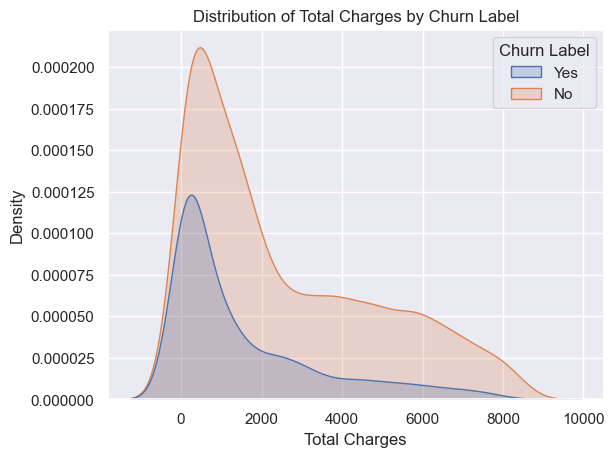

The KDE plot shows that customers who churn tend to have lower total charges, with their distribution peaking at lower values, while non-churned customers, despite also peaking at lower total charges, exhibit a broader distribution across higher total charges,total charges alone may not be a definitive predictor of churn, as there is significant overlap between the churned and non-churned groups

In [273]:
# Plot distribution of 'Total Charges' with 'Churn Label' as hue
sns.kdeplot(df, x='Total Charges', hue='Churn Label',fill=True)
plt.title('Distribution of Total Charges by Churn Label')
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.show()
printmd('The KDE plot shows that customers who churn tend to have lower total charges, with their distribution peaking at lower values, while non-churned customers, despite also peaking at lower total charges, exhibit a broader distribution across higher total charges,total charges alone may not be a definitive predictor of churn, as there is significant overlap between the churned and non-churned groups')

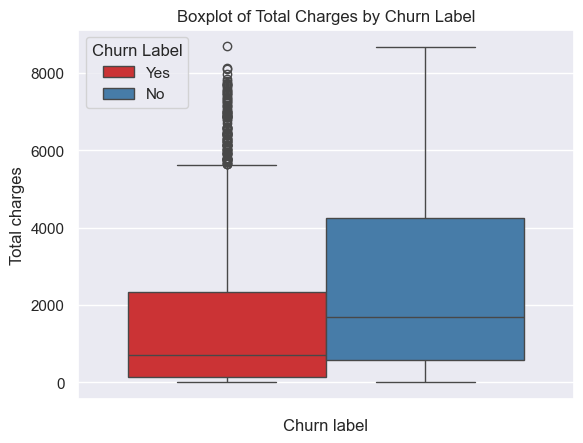

The boxplot shows that customers who have churned (red) generally have lower total charges with less variation, while non-churned customers (blue) have higher total charges with greater variation.

In [274]:
sns.boxplot(df, y='Total Charges', hue='Churn Label',palette='Set1')
plt.title('Boxplot of Total Charges by Churn Label')
plt.xlabel('Churn label')
plt.ylabel('Total charges')
plt.show()
printmd('The boxplot shows that customers who have churned (red) generally have lower total charges with less variation, while non-churned customers (blue) have higher total charges with greater variation.')

- Monthly Charges

Distribution of Monthly Charges amongst the churn classes

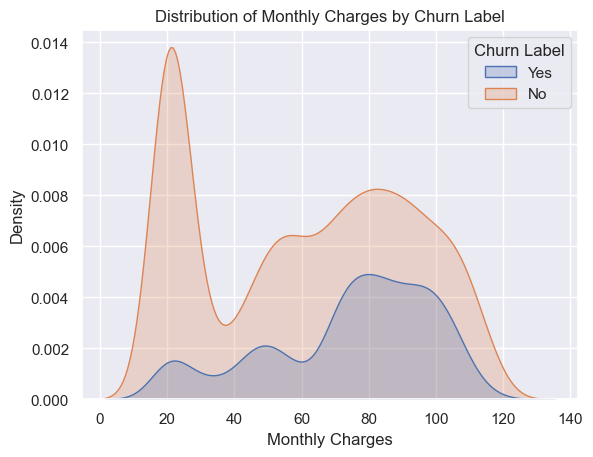

The KDE plot shows that customers who churn (blue) generally have higher monthly charges, while those who do not churn (orange) tend to have lower monthly charges, with significant overlap in the middle range

In [275]:
# Plot distribution of 'monthly Charges' with 'Churn Label' as hue
sns.kdeplot(df, x='Monthly Charges', hue='Churn Label',fill=True)
plt.title('Distribution of Monthly Charges by Churn Label')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()
printmd('The KDE plot shows that customers who churn (blue) generally have higher monthly charges, while those who do not churn (orange) tend to have lower monthly charges, with significant overlap in the middle range')

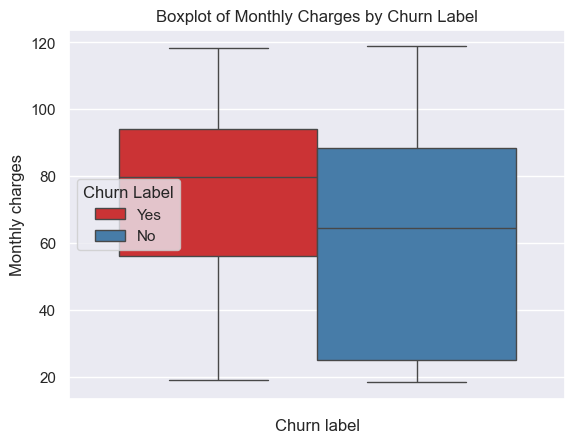

The box plot shows that customers who have churned tend to have higher median monthly charges compared to those who have not churned.

In [276]:
sns.boxplot(df, y='Monthly Charges', hue='Churn Label',palette='Set1')
plt.title('Boxplot of Monthly Charges by Churn Label')
plt.xlabel('Churn label')
plt.ylabel('Monthly charges')
plt.show()
printmd('The box plot shows that customers who have churned tend to have higher median monthly charges compared to those who have not churned.')

- Tenure
Distribution of tenure duration( in months) amongs churn label

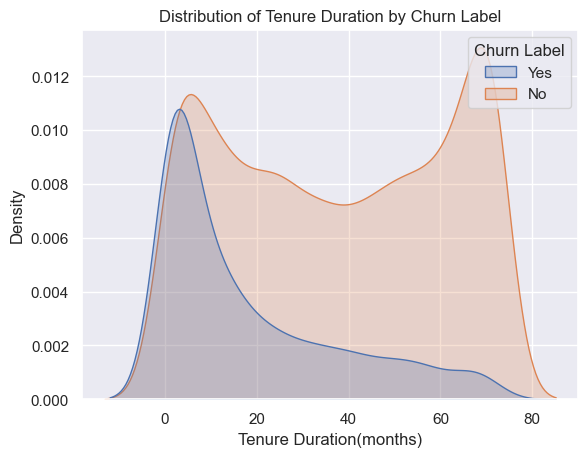

The density plot shows that customers who have churned (blue curve) tend to have shorter tenure durations compared to those who have not churned (orange curve), indicating that tenure duration may influence customer churn wich is consistent with our ealier plot of contract type

In [277]:
# Plot distribution of tenur duration with 'Churn Label' as hue
sns.kdeplot(df, x='Tenure Months', hue='Churn Label',fill=True)
plt.title('Distribution of Tenure Duration by Churn Label')
plt.xlabel('Tenure Duration(months)')
plt.ylabel('Density')
plt.show()
printmd('The density plot shows that customers who have churned (blue curve) tend to have shorter tenure durations compared to those who have not churned (orange curve), indicating that tenure duration may influence customer churn wich is consistent with our ealier plot of contract type')

- Customer Longterm value

Exploring the distribution of customer value in relation to churn

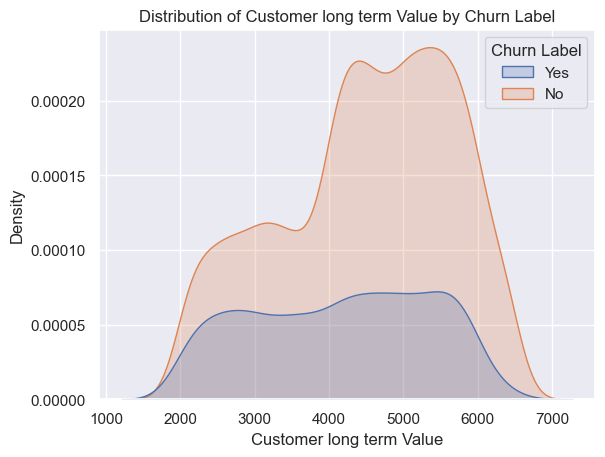

The density plot shows that customers who have churned (orange curve) tend to have lower long-term values compared to those who have not churned (blue curve), indicating that customer long-term value may influence churn.

In [278]:
# distribution of 'CLTV' with 'Churn Label' as hue
sns.kdeplot(df, x='CLTV', hue='Churn Label',fill=True)
plt.title('Distribution of Customer long term Value by Churn Label')
plt.xlabel('Customer long term Value')
plt.ylabel('Density')
plt.show()
printmd('The density plot shows that customers who have churned (orange curve) tend to have lower long-term values compared to those who have not churned (blue curve), indicating that customer long-term value may influence churn.')

### 4.4 Insights

- During the dataset’s time frame, only 24% of customers ended their subscriptions.

- A high churn rate was observed among senior citizens, with the primary reason being a switch to other telecom companies.

- Churn rates appear to be independent of gender.

- Individuals without partners or dependents tend to churn at a higher rate.

- Los Angeles, despite having the highest number of subscribers, also has a high churn rate. The main reason for churn is customers switching to other telecom companies that offer higher download speeds and more data.

- Customers with month-to-month contracts have a higher churn rate compared to those with long-term contracts.

- Customers who make payments via electronic check have a significantly higher churn rate compared to other payment methods.

# 5.0 Model Fitting & Evaluation

Predicting customer churn is a classification problem that can be effectively addressed with logistic regression in machine learning. I have selected Logistic Regression as my foundational model. For comparison, I am employing the Random Forest classifier, which is adept at managing outliers and capturing complex, non-linear patterns.

For model evaluation, I am prioritizing the Precision metric because it reduces the occurrence of false positives, ensuring that when a recipe is forecasted to have high traffic, it is indeed highly probable.

### 5.1 Data Pre-Processing

- Categorical variables have been transformed into numerical features.

- Numerical features have been normalized.

- The dataset has been divided into training and test sets for model validation.

#### Feature Egngineering

In [279]:
df_model= df.copy()
#droping columns with low importance to the model
df_model.drop(columns=['CustomerID','City','Latitude','Longitude','Churn Label','Churn Score','Churn Reason','Monthly Charges'],axis=1,inplace=True)

#### One Hot encoding

In [280]:
#applying one-hot encoding
df_model=pd.get_dummies(df_model,dtype=int)

#### Train-Test Split

In [281]:
#defining the Target and features
y= df_model['Churn Value']
X= df_model.drop('Churn Value',axis=1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y, random_state=SEED)

#### Normalization

In [282]:
#Normalization of the freatures using a StandardScaler
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

#### Data Balancing

In [283]:
# Apply SMOTE to the training set to resolve the model imbalance
smote = SMOTE(random_state=SEED)
#Resampling to balance the dataset
X_sm, y_sm = smote.fit_resample(X, y)
# Split the dataset into training and test sets
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=SEED)


### 5.2 Logistic Regression Model

- Model instatiation

In [284]:
#Expatiating the Logistic regression model on the imbalanced dataset
logreg=LogisticRegression()
#Training our model on the training set
logreg.fit(X_train_scaled,y_train)

LogisticRegression()

- Model Evaluation

In [285]:
# Predictions
y_pred_log = logreg.predict(X_test_scaled)
y_pred_proba_log = logreg.predict_proba(X_test_scaled)[:,1]  # probabilities for the churn class
# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

print(classification_report(y_test, y_pred_log, labels=[0,1]))

print("AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_proba_log)))


Confusion Matrix:
 [[1149  145]
 [ 192  275]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1294
           1       0.65      0.59      0.62       467

    accuracy                           0.81      1761
   macro avg       0.76      0.74      0.75      1761
weighted avg       0.80      0.81      0.81      1761

AUC: 0.86


- Modelling on the balanced dataset

In [286]:
#expantiating
logreg_sm=LogisticRegression()
#Training our model on the training set
logreg_sm.fit(X_train_sm,y_train_sm)
import warnings
warnings.filterwarnings('ignore')


Confusion Matrix:
 [[894 121]
 [166 889]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1015
           1       0.88      0.84      0.86      1055

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070

AUC: 0.94


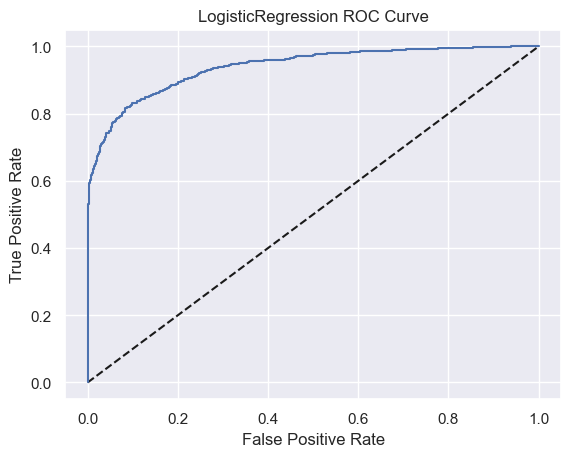

In [287]:
# Predictions
y_pred_log_sm = logreg_sm.predict(X_test_sm)
y_pred_proba_sm = logreg_sm.predict_proba(X_test_sm)[:,1]  # probabilities for the churn class
#Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test_sm, y_pred_log_sm))

print(classification_report(y_test_sm, y_pred_log_sm, labels=[0,1]))

print("AUC: {:.2f}".format(roc_auc_score(y_test_sm, y_pred_proba_sm)))


fpr, tpr, thresholds = roc_curve(y_test_sm, y_pred_proba_sm)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression ROC Curve')
plt.show()


The accuracy of 0.77 is quite low for classification which could be as a result of an inbalanced dataset.The precision & f1 score is too low for Class 1 ( churned customers) but the model does well at correctly predicting churned customers with a recall score of 0.8
The models AUC is 0.85 signifying the model is doing well at predicting and not just guessing

### 5.3 Random Forest Model

- Model Instatiation

In [288]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=6,min_samples_leaf=8,random_state=SEED)
# Fit the model to your data
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=42)

In [289]:
# Predictions
y_pred_rf = rf.predict(X_test_scaled)
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:,1]  # probabilities for the positive class

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print(classification_report(y_test, y_pred_rf, labels=[0,1]))

print("AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_proba_rf)))

Confusion Matrix:
 [[1191  103]
 [ 239  228]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1294
           1       0.69      0.49      0.57       467

    accuracy                           0.81      1761
   macro avg       0.76      0.70      0.72      1761
weighted avg       0.79      0.81      0.79      1761

AUC: 0.86


- Modelling on the balanced dataset

In [290]:
#Expatiating the Logistic regression model on the re-balanced dataset
# Initialize the Random Forest classifier
rf_sm = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=6,min_samples_leaf=8,random_state=SEED)
# Fit the model to your data

rf_sm.fit(X_train_sm,y_train_sm)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=42)

Confusion Matrix:
 [[830 185]
 [116 939]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1015
           1       0.84      0.89      0.86      1055

    accuracy                           0.85      2070
   macro avg       0.86      0.85      0.85      2070
weighted avg       0.86      0.85      0.85      2070

AUC: 0.93


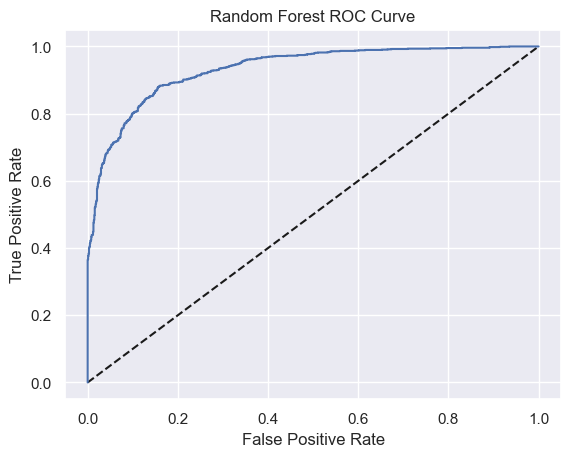

In [291]:
# Predictions
y_pred_rf_sm = rf_sm.predict(X_test_sm)
y_pred_proba_rf_sm = rf_sm.predict_proba(X_test_sm)[:,1]  # probabilities for the positive class

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test_sm, y_pred_rf_sm))

print(classification_report(y_test_sm, y_pred_rf_sm, labels=[0,1]))

print("AUC: {:.2f}".format(roc_auc_score(y_test_sm, y_pred_proba_rf_sm)))

fpr, tpr, thresholds = roc_curve(y_test_sm, y_pred_proba_rf_sm)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

The random forest model as an accuracy score of 0.85.The model does well at correctly predicting churned customers with a recall score of 0.87
The models AUC is 0.94 signifying the model is doing well at predicting and not just random guessing

- Feature importance

Perfoming dimentionality reduction removing features with little or no importance to the model

In [307]:
print(rf.feature_importances_)

[0.01369341 0.12677089 0.06932547 0.01501173 0.00108597 0.00184315
 0.00287818 0.00195891 0.00336837 0.00381321 0.04014012 0.04311524
 0.00138658 0.00092869 0.00239383 0.0008615  0.00305611 0.03080776
 0.07915141 0.00597494 0.06769861 0.00555008 0.01500906 0.02166647
 0.00639017 0.00616377 0.0188787  0.00580931 0.00243145 0.07517016
 0.00141075 0.00972638 0.00334839 0.0122472  0.00335063 0.00165897
 0.00894786 0.00488978 0.15581499 0.01951274 0.03823849 0.00996715
 0.00977786 0.00243089 0.00330263 0.04126707 0.00177497]


In [294]:
rfe = RFE(estimator=RandomForestClassifier(),
n_features_to_select=4, verbose=1)
rfe.fit(X_train_sm,y_train_sm)
print(accuracy_score(y_test_sm, rfe.predict(X_test_sm)))

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 fe

RFE(estimator=RandomForestClassifier(), n_features_to_select=4, verbose=1)

         Feature  Importance
0       Zip Code        0.01
1  Tenure Months        0.13
2  Total Charges        0.07
3           CLTV        0.02


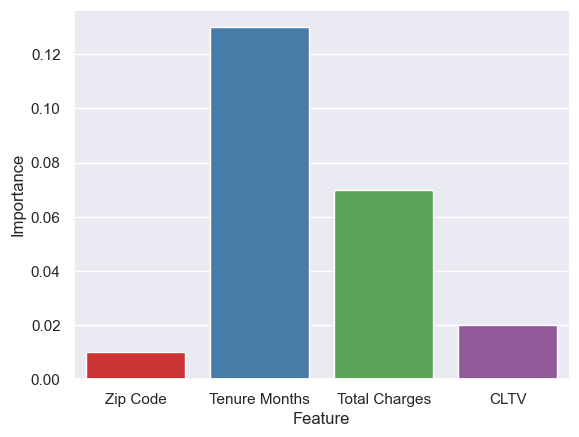

In [305]:
# Create a DataFrame with the selected features and their importance values
importance = pd.DataFrame({
    'Feature': X.columns[rfe.support_],
    'Importance': rf.feature_importances_[rfe.support_].round(2)
})

print(importance)

sns.barplot(x='Feature', y='Importance',data=importance,palette="Set1")
plt.show()

# 6.0 Insights

The telecommunications company’s goal is to accurately predict customer churn with a minimum accuracy of 80%. The primary business metric for tracking this goal is recall accuracy, with a particular emphasis on precisely predicting which customers will churn. This focus is directly tied to the business objective of customer retention, as retaining existing customers is more cost-effective in the telecom industry than acquiring new ones.
The telecome company can enact the following recommendations for model deployment.

- The business should consistently track the accuracy score of the model’s predictions to measure how frequently the churn predictions are correct.

- Considering that the random forest as a recall scores of 0.87 and ROC AUC of 0.94, it’s advisable to set an initial recall target a bit lower, around 0.75-0.80, to allow for any potential overfitting or shifts in data trends once the model is operational.

- With ongoing data collection, The telecom company can fine-tune this target based on real-world performance and evolving business requirements. Should the models regularly hit or surpass the set recall score, it would be prudent to increase the target to mirror advancements in model accuracy or shifts in business strategies.